In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import pandas as pd
import yfinance as yf

In [4]:
Tesla = yf.download('TSLA', start='2020-01-01', end='2025-01-01')
Tesla.reset_index(inplace=True)
Tesla.to_csv('tesla_data.csv', index=False)
print(Tesla.head())

[*********************100%***********************]  1 of 1 completed

Price        Date  Adj Close      Close       High        Low       Open  \
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA   
0      2020-01-02  28.684000  28.684000  28.713333  28.114000  28.299999   
1      2020-01-03  29.534000  29.534000  30.266666  29.128000  29.366667   
2      2020-01-06  30.102667  30.102667  30.104000  29.333332  29.364668   
3      2020-01-07  31.270666  31.270666  31.441999  30.224001  30.760000   
4      2020-01-08  32.809334  32.809334  33.232666  31.215334  31.580000   

Price      Volume  
Ticker       TSLA  
0       142981500  
1       266677500  
2       151995000  
3       268231500  
4       467164500  


In [5]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [4]:
table = soup.find_all('table')[0] 
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [5]:
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')  # Clean up revenue data
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])
print(tesla_revenue.tail())

    Date  Revenue
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


In [7]:
import yfinance as yf 
import pandas as pd
gme_data = yf.download('GME', start='2020-01-01', end='2025-01-01')
gme_data.reset_index(inplace=True)
gme_data.to_csv('gme_data.csv', index=False)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date Adj Close   Close    High     Low    Open    Volume
Ticker                  GME     GME     GME     GME     GME       GME
0      2020-01-02    1.5775  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03    1.4700  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06    1.4625  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07    1.3800  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08    1.4300  1.4300  1.4625  1.3525  1.3725  22517600


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find_all('table')[0]
rows = table.find_all('tr')
data = []
for row in rows[1:]: 
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')  # Clean up revenue data
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

print(gme_revenue.tail())


    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


[*********************100%***********************]  1 of 1 completed


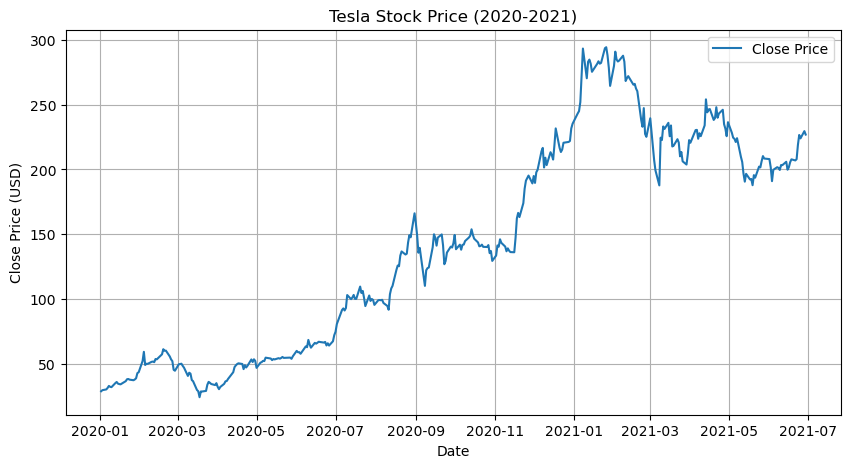

In [10]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
tesla_data = yf.download('TSLA', start='2020-01-01', end='2021-06-30')
tesla_data.reset_index(inplace=True)

make_graph(tesla_data, 'Tesla Stock Price (2020-2021)')


[*********************100%***********************]  1 of 1 completed


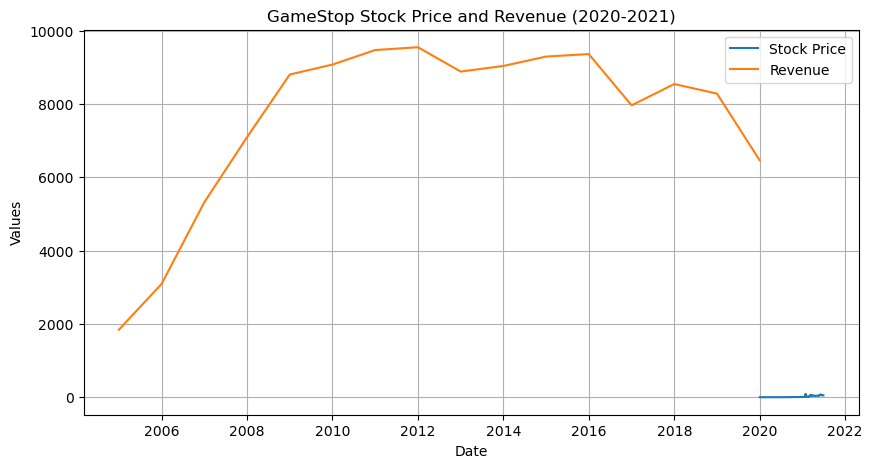

In [12]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
gme_data = yf.download('GME', start='2020-01-01', end='2021-06-30')
gme_data.reset_index(inplace=True)
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find_all('table')[0]
rows = table.find_all('tr')
data = []
for row in rows[1:]: 
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '') 
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

make_graph(gme_data, gme_revenue, 'GameStop Stock Price and Revenue (2020-2021)')
